#Technical Part of Our Study

This ip^ynb file is designed for external readers to understand how we conducted our study to understand how facial recognition affects gender and aged recognition for trans individuals, in comparison to cisgender individuals. The comments are made to make the code as comprehensive as possible. feel free to reach me for any question at my email : julien.vitry@sciencespo.fr.

The Model we chose is the Caffemodel algorithm. Created in 2014-2016, it is interesting to study it as it may suffer from internal biases as the dataset it was trained on may not be fit to a larger women-based sample or on a transgender-based sample of individuals. We know it may be depreciated, but is is more beginner-friendly than other models as DeepFace (even thouigh we can debate over that !).

##Face Analysis

This part aims to see how the algorithm will analyse the different pictures passed as parameters. It is an essential step to produce the whole dataset we will analyse in a second part.

###The Program that we will use

The algorithm used is extracted from the following Github Repository: https://github.com/shantnu/FaceDetect

The Tutorial for using it is indicated on the following link: https://realpython.com/face-recognition-with-python/

Note that this algorithm and code is furnished via our Class "Decodinv biases in AI" held by Jean-Philippe Cointet at Sciences Po Paris, during the 2024-2025 Spring Semester. All rights are reserved to the original ccreator, we are only using the algorithm to test its limits and adapted it to our study. We are not claiming of having created the algorithm at all, we are only using it and adapting it to our needs.

Over our study, we will analyze poictures of celebrities. We chose them based on a random selection operated by ChatGPT. We acknowledge that it is biased, we will discuss it as well in our discussion of results (cf final website). The choice of celebrities is mostly done regarding the GDPR, as the pictures are available publicly, we are not infringing any private-life related contents or topics.

###Installing the requirements
As the program, openCV, requires specific packages, we should install them. We just need to execute the following command:

In [ ]:
# install requirements to run openCV
!apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python


The next part is about loading the different packages. It will allow us to make our code work. I load the pics from my drive.

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


This part is aimed to copy the pictures on a repository, easier to access to have a better formatting of coding. So that, the rest of the code won't be needing to be changed with our personnal paths on drive.

In [ ]:
dataset_path = '/content/drive/MyDrive/M1/Decoding_Biases_Final/Pictures/Trans_Sample'
annotation_folder = "trans_sample" #Alternatively cis_sample for the other sample.
local_folder_path = os.path.join(os.path.abspath('.'), annotation_folder)

# If the folder doesn't exist locally, copy it from Drive
if not os.path.exists(local_folder_path):
    print(f"Copying dataset from {dataset_path} to {local_folder_path}...")
    # Use shutil.copytree for copying directory with files
    import shutil
    shutil.copytree(dataset_path, local_folder_path)
    print("Dataset copied!")
else:
    print("Dataset already exists locally.")

Copying dataset from /content/drive/MyDrive/M1/Decoding_Biases_Final/Pictures/Trans_Sample to /content/trans_sample...
Dataset copied!


####Simple Analysis
The following 7 blocks of code are to run the code picture by picture. You can skip them to go to the general loop if you prefer an efficient analysis. Please, replay all the block everytime you need to analyse a different picture (that's why you should jump to the next part if you must analyze a larger sample).

Coming to the next block. The Goal is to first load the picture we want to analyse.

In [ ]:
# Assuming 'local_folder_path' points to your 'Trans_Sample' dataset
image_path = '/content/cis_sample/Daniel_Radcliffe.jpg.webp'
# Load the image
image = cv2.imread(image_path)

# Check if the image loaded properly
if image is None:
    raise ValueError(f"Failed to load image from {image_path}")

print("Image loaded successfully!")

Image loaded successfully!


The Algorithm works thanks to binary files, acting like programs.

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import urllib.request

# Load the models using the downloaded files
face1 = "/content/drive/MyDrive/M1/Decoding_Biases_Final/Age_and_Gender_Detection_OpenCV/opencv_face_detector.pbtxt"
face2 = "/content/drive/MyDrive/M1/Decoding_Biases_Final/Age_and_Gender_Detection_OpenCV/opencv_face_detector_uint8.pb"
age1 = "/content/drive/MyDrive/M1/Decoding_Biases_Final/Age_and_Gender_Detection_OpenCV/age_deploy.prototxt"
age2 = "/content/drive/MyDrive/M1/Decoding_Biases_Final/Age_and_Gender_Detection_OpenCV/age_net.caffemodel"
gen1 = "/content/drive/MyDrive/M1/Decoding_Biases_Final/Age_and_Gender_Detection_OpenCV/gender_deploy.prototxt"
gen2 = "/content/drive/MyDrive/M1/Decoding_Biases_Final/Age_and_Gender_Detection_OpenCV/gender_net.caffemodel"

MODEL_MEAN_VALUES = (78.4263377603, 87.7689143744, 114.895847746)

# Using models
# Face
face = cv2.dnn.readNet(face2, face1)

# age
age = cv2.dnn.readNet(age2, age1)

# gender
gen = cv2.dnn.readNet(gen2, gen1)

We then set up our categories (Age and Gender). Age categories don't go under 16 as it is approximately the minimum age of our sample (it is 18 actually but we prefer keeping it at 16 to ensure a right treatment and assume the algo may have a margin of error).

In [ ]:
# Categories of distribution
la = ['(16-20)',
      '(21-32)', '(34-45)', '(46-54)', '(55-65)', '(66-75)', '(76-84)', '(85-100)']
lg = ['Male', 'Female']

The Image is then copied

In [ ]:
fr_cv = image.copy()

This part is dedicated to observe if there are faces on the picture.

In [ ]:
# Face detection
fr_h = fr_cv.shape[0]
fr_w = fr_cv.shape[1]
blob = cv2.dnn.blobFromImage(fr_cv, 1.0, (300, 300),
                             [104, 117, 123], True, False)

face.setInput(blob)
detections = face.forward()

This next pert localizes and return the coordinates of the face on the picture.

In [ ]:
faceBoxes = []
for i in range(detections.shape[2]):

    #Bounding box creation if confidence > 0.7
    confidence = detections[0, 0, i, 2]
    if confidence > 0.7:

        x1 = int(detections[0, 0, i, 3]*fr_w)
        y1 = int(detections[0, 0, i, 4]*fr_h)
        x2 = int(detections[0, 0, i, 5]*fr_w)
        y2 = int(detections[0, 0, i, 6]*fr_h)

        faceBoxes.append([x1, y1, x2, y2])

        cv2.rectangle(fr_cv, (x1, y1), (x2, y2),
                      (0, 255, 0), int(round(fr_h/150)), 8)

faceBoxes

[[485, 93, 740, 421]]

Here is where the magic happens ! The algorithm check first the gender, if the level of confidence is too low for detecting the face, then the program return "Uncertain" Rather than a defined gender. It should prevent a misgendering of personnalities that should be analyzed.

Then, the age is computed from our previous basis and then will be analyzed.

[485, 93, 740, 421]
Gender : Male, Age : (76-84)
[[9.9998951e-01 1.0458238e-05]]


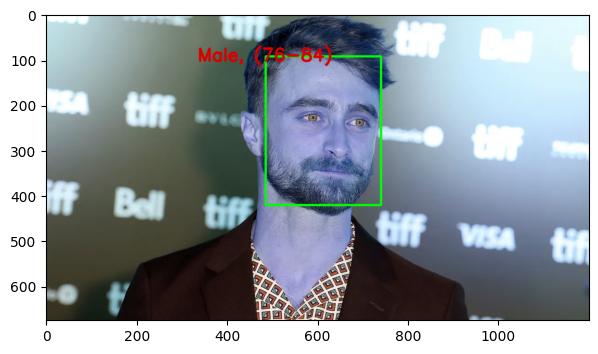

In [ ]:
# Checking if face detected or not
if not faceBoxes:
    print("No face detected")

# Final results (otherwise)
# Loop for all the faces detected
for faceBox in faceBoxes[0:1]:
    print(faceBox)

    #Extracting face as per the faceBox
    face = fr_cv[max(0, faceBox[1]-15):
                 min(faceBox[3]+15, fr_cv.shape[0]-1),
                 max(0, faceBox[0]-15):min(faceBox[2]+15,
                               fr_cv.shape[1]-1)]

    #Extracting the main blob part
    blob = cv2.dnn.blobFromImage(
        face, 1.0, (227, 227), MODEL_MEAN_VALUES, swapRB=False)

    #Prediction of gender
    gen.setInput(blob)
    genderPreds = gen.forward()
    gender_confidence = genderPreds[0][genderPreds[0].argmax()]
    if gender_confidence < 0.7:
      gender = "Uncertain"
    gender = lg[genderPreds[0].argmax()]

    #Prediction of age
    age.setInput(blob)
    agePreds = age.forward()
    predicted_age = la[agePreds[0].argmax()]
    print("Gender : {}, Age : {}".format(gender, predicted_age))
    #Putting text of age and gender
    #At the top of box
    cv2.putText(fr_cv,
                f'{gender}, {predicted_age}',
                (faceBox[0]-150, faceBox[1]+10),
                cv2.FONT_HERSHEY_SIMPLEX,
                1.3,
                (217, 0, 0),
                4,
                cv2.LINE_AA)

    plt.figure(figsize=(7, 7))
    plt.imshow(fr_cv)
    print(genderPreds)

####Largely Framed Analysis
This code reproduced the previous block but analyse the pictures 10 by 10. It is runing until it analyses the whole dataframe. The loop analysing the pictures run 10 by 10 to ensure a smooth running of the program and, if fails, at least we have some buffers analyzed.

This section can be run independantly of the previous subpart.

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

# Loading the models
face1 = "/content/drive/MyDrive/M1/Decoding_Biases_Final/Age_and_Gender_Detection_OpenCV/opencv_face_detector.pbtxt"
face2 = "/content/drive/MyDrive/M1/Decoding_Biases_Final/Age_and_Gender_Detection_OpenCV/opencv_face_detector_uint8.pb"
age1 = "/content/drive/MyDrive/M1/Decoding_Biases_Final/Age_and_Gender_Detection_OpenCV/age_deploy.prototxt"
age2 = "/content/drive/MyDrive/M1/Decoding_Biases_Final/Age_and_Gender_Detection_OpenCV/age_net.caffemodel"
gen1 = "/content/drive/MyDrive/M1/Decoding_Biases_Final/Age_and_Gender_Detection_OpenCV/gender_deploy.prototxt"
gen2 = "/content/drive/MyDrive/M1/Decoding_Biases_Final/Age_and_Gender_Detection_OpenCV/gender_net.caffemodel"

# Loading networks
face_net = cv2.dnn.readNet(face2, face1)
age_net = cv2.dnn.readNet(age2, age1)
gender_net = cv2.dnn.readNet(gen2, gen1)

MODEL_MEAN_VALUES = (78.4263377603, 87.7689143744, 114.895847746)
AGE_LABELS = ['(16-20)', '(21-32)', '(34-45)', '(46-54)', '(55-65)', '(66-75)', '(76-84)', '(85-100)']
GENDER_LABELS = ['Male', 'Female']

# Loading files
image_folder = '/content/trans_sample'  # Or alternatively cis_sample...
batch_size = 10

# Listing file images
image_files = [os.path.join(image_folder, f) for f in os.listdir(image_folder)
               if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Treating one picture
def process_image(image_path):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Erreur de lecture : {image_path}")
        return

    fr_cv = image.copy()
    fr_h, fr_w = fr_cv.shape[:2]
    blob = cv2.dnn.blobFromImage(fr_cv, 1.0, (300, 300), [104, 117, 123], True, False)

    face_net.setInput(blob)
    detections = face_net.forward()
    faceBoxes = []

    for i in range(detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > 0.7:
            x1 = int(detections[0, 0, i, 3] * fr_w)
            y1 = int(detections[0, 0, i, 4] * fr_h)
            x2 = int(detections[0, 0, i, 5] * fr_w)
            y2 = int(detections[0, 0, i, 6] * fr_h)
            faceBoxes.append([x1, y1, x2, y2])
            cv2.rectangle(fr_cv, (x1, y1), (x2, y2), (0, 255, 0), int(round(fr_h / 150)), 8)

    if not faceBoxes:
        print(f"Aucun visage détecté : {image_path}")
        return

    for faceBox in faceBoxes[:1]:  # possible to remove the [1:] if we want to analyze pictures with several persons on it.
        face_crop = fr_cv[max(0, faceBox[1]-15):min(faceBox[3]+15, fr_cv.shape[0]-1),
                          max(0, faceBox[0]-15):min(faceBox[2]+15, fr_cv.shape[1]-1)]

        blob = cv2.dnn.blobFromImage(face_crop, 1.0, (227, 227), MODEL_MEAN_VALUES, swapRB=False)

        # Gender
        gender_net.setInput(blob)
        gender_preds = gender_net.forward()
        gender_conf = gender_preds[0][gender_preds[0].argmax()]
        gender = GENDER_LABELS[gender_preds[0].argmax()] if gender_conf >= 0.7 else "Uncertain"

        # Age
        age_net.setInput(blob)
        age_preds = age_net.forward()
        predicted_age = AGE_LABELS[age_preds[0].argmax()]

        label = f'{gender}, {predicted_age}'
        print(f"{os.path.basename(image_path)} -> {label}")

        cv2.putText(fr_cv, label, (faceBox[0]-150, faceBox[1]+10),
                    cv2.FONT_HERSHEY_SIMPLEX, 1.3, (217, 0, 0), 4, cv2.LINE_AA)

        plt.imshow(cv2.cvtColor(fr_cv, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title(label)
        plt.show()

# Looping over the pics on the folder
for i in range(0, len(image_files), batch_size):
    batch = image_files[i:i + batch_size]
    print(f"\n--- Traitement du lot {i // batch_size + 1} ---")
    for image_path in batch:
        process_image(image_path)

Output hidden; open in https://colab.research.google.com to view.

Once these steps completed. we report these observations on our dataset and then can step up to the analysis of the results.

As you observed before, a lot of elements are going wrong, let's put it together.

##Analysis of The Results

This section is aimed to lead data analysis from the data we collected and then compared with the algorithm's analysis.

To do so, we must use two dataset we created to analyze both age and gender detected for both cisgender and trans individuals. First we need to mount the correct packcages.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Now we must open the two excel files to work on for a comparative analysis.

In [3]:
import pandas as pd
df_trans = pd.read_csv("/content/drive/MyDrive/M1/Decoding_Biases_Final/To_Analyse/trans_sample.csv")
df_cis = pd.read_csv("/content/drive/MyDrive/M1/Decoding_Biases_Final/To_Analyse/cis_sample.csv")

In [4]:
df_trans

,Personnality,Picture_found,Female,Male,Non-binary,Age,Female_AI,Male_AI,Non-binary_AI,Age_perceived_AI
0,Laverne Cox,1,1,0,0,52.0,1,0,0,20
1,Elliot Page,1,0,0,1,38.0,0,1,0,32
2,Janet Mock,1,1,0,0,42.0,0,1,0,55
3,Jazz Jennings,1,1,0,0,24.0,0,1,0,76
4,Hunter Schafer,1,1,0,0,26.0,0,1,0,20
...,...,...,...,...,...,...,...,...,...,...
100,Thirza Cuthand,1,0,1,0,46.0,0,1,0,85
101,Kaitlyn Alexander,1,0,0,1,32.0,0,1,0,76
102,Karla Sofia Gascon,1,1,0,0,53.0,0,1,0,53
103,Leon Salin,1,0,1,0,28.0,0,1,0,28


In [5]:
df_cis

,Personnality,Picture_found,Female,Male,Non-Binary,Age,Male_AI,Female_AI,Uncertain_AI,Age_AI
0,Barack Obama,1,0,1,0,63,1,0,0,70
1,Angela Merkel,1,1,0,0,70,1,0,0,70
2,Emmanuel Macron,1,0,1,0,47,1,0,0,76
3,Oprah Winfrey,1,1,0,0,71,1,0,0,76
4,Brad Pitt,1,0,1,0,61,1,0,0,76
...,...,...,...,...,...,...,...,...,...,...
97,Amy Schumer,1,1,0,0,43,1,0,0,20
98,Rachel Maddow,1,1,0,0,52,1,0,0,45
99,Tina Fey,1,1,0,0,54,0,0,1,20
100,Steve Carell,1,0,1,0,62,1,0,0,45


To ensure a proper read and comparison of the datasets, we look to first standardize the columns' name. Then we remove the rows where there is no defined AI_Age meaning that the AI couldn't analyse the sample pics (only the df_trans is concerned).

In [6]:
df_trans = df_trans.rename(columns={'Age_perceived_AI': 'Age_AI', 'Non-binary_AI': 'Uncertain_AI', 'Non-binary' : 'Non-Binary'})

In [7]:
# Remove rows where Age_AI is 0
df_trans = df_trans[df_trans['Age_AI'] != 0]
df_cis = df_cis[df_cis['Age_AI'] != 0]

Here are the clear datasets on which we will work on.

In [8]:
df_trans

,Personnality,Picture_found,Female,Male,Non-Binary,Age,Female_AI,Male_AI,Uncertain_AI,Age_AI
0,Laverne Cox,1,1,0,0,52.0,1,0,0,20
1,Elliot Page,1,0,0,1,38.0,0,1,0,32
2,Janet Mock,1,1,0,0,42.0,0,1,0,55
3,Jazz Jennings,1,1,0,0,24.0,0,1,0,76
4,Hunter Schafer,1,1,0,0,26.0,0,1,0,20
...,...,...,...,...,...,...,...,...,...,...
100,Thirza Cuthand,1,0,1,0,46.0,0,1,0,85
101,Kaitlyn Alexander,1,0,0,1,32.0,0,1,0,76
102,Karla Sofia Gascon,1,1,0,0,53.0,0,1,0,53
103,Leon Salin,1,0,1,0,28.0,0,1,0,28


In [9]:
df_cis

,Personnality,Picture_found,Female,Male,Non-Binary,Age,Male_AI,Female_AI,Uncertain_AI,Age_AI
0,Barack Obama,1,0,1,0,63,1,0,0,70
1,Angela Merkel,1,1,0,0,70,1,0,0,70
2,Emmanuel Macron,1,0,1,0,47,1,0,0,76
3,Oprah Winfrey,1,1,0,0,71,1,0,0,76
4,Brad Pitt,1,0,1,0,61,1,0,0,76
...,...,...,...,...,...,...,...,...,...,...
97,Amy Schumer,1,1,0,0,43,1,0,0,20
98,Rachel Maddow,1,1,0,0,52,1,0,0,45
99,Tina Fey,1,1,0,0,54,0,0,1,20
100,Steve Carell,1,0,1,0,62,1,0,0,45


###Misgendering

The first, and most important gap for our analysis as it is at the heart of the identities. Let's observe the results...

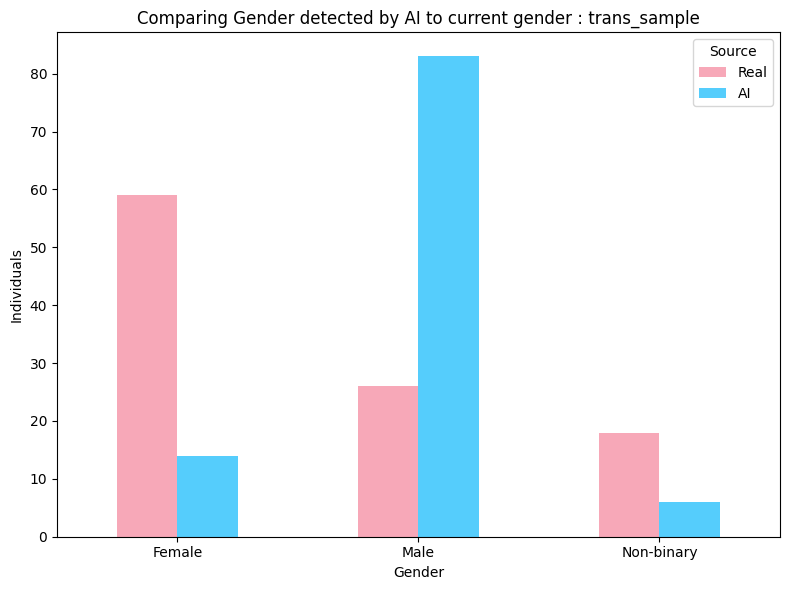

In [10]:
current_gender = {
    'Female': df_trans['Female'].sum(),
    'Male': df_trans['Male'].sum(),
    'Non-binary': df_trans['Non-Binary'].sum()
}

AI_Gender = {
    'Female': df_trans['Female_AI'].sum(),
    'Male': df_trans['Male_AI'].sum(),
    'Non-binary': df_trans['Uncertain_AI'].sum()
}

comparison = pd.DataFrame([current_gender, AI_Gender], index=['Real', 'AI']).T

# Map each gender to a flag-inspired color
colors_by_gender = {
    'Female': '#F7A8B8',
    'Male': '#55CDFC',
    'Non-binary': '#eeeeee'
}

# Apply colors per gender group (this is for both Real and AI bars, alternating)
bar_colors = [colors_by_gender.get(gender, '#cccccc') for gender in comparison.index]

# Plot with custom colors for gender groups
ax = comparison.plot(kind='bar', figsize=(8, 6), color=['#F7A8B8', '#55CDFC', '#eeeeee'])

# Optional: Update legend and aesthetics
plt.title("Comparing Gender detected by AI to current gender : trans_sample")
plt.ylabel("Individuals")
plt.xlabel("Gender")
plt.xticks(rotation=0)
plt.legend(title="Source")
plt.tight_layout()
plt.show()

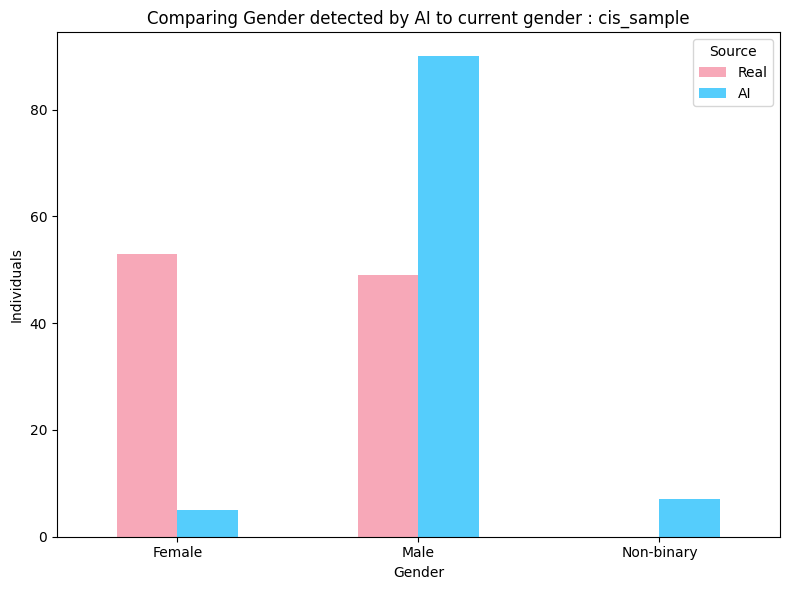

In [11]:
current_gender = {
    'Female': df_cis['Female'].sum(),
    'Male': df_cis['Male'].sum(),
    'Non-binary': df_cis['Non-Binary'].sum()
}

AI_Gender = {
    'Female': df_cis['Female_AI'].sum(),
    'Male': df_cis['Male_AI'].sum(),
    'Non-binary': df_cis['Uncertain_AI'].sum()
}

comparison = pd.DataFrame([current_gender, AI_Gender], index=['Real', 'AI']).T

# Map each gender to a flag-inspired color
colors_by_gender = {
    'Female': '#F7A8B8',
    'Male': '#55CDFC',
    'Non-binary': '#eeeeee'
}

# Apply colors per gender group (this is for both Real and AI bars, alternating)
bar_colors = [colors_by_gender.get(gender, '#cccccc') for gender in comparison.index]

# Plot with custom colors for gender groups
ax = comparison.plot(kind='bar', figsize=(8, 6), color=['#F7A8B8', '#55CDFC', '#eeeeee'])

# Optional: Update legend and aesthetics
plt.title("Comparing Gender detected by AI to current gender : cis_sample")
plt.ylabel("Individuals")
plt.xlabel("Gender")
plt.xticks(rotation=0)
plt.legend(title="Source")
plt.tight_layout()
plt.show()

Results are obviously abnormal. Thus, we must go deeper to see clearer the mismatching and which sample is more impacted by this default.

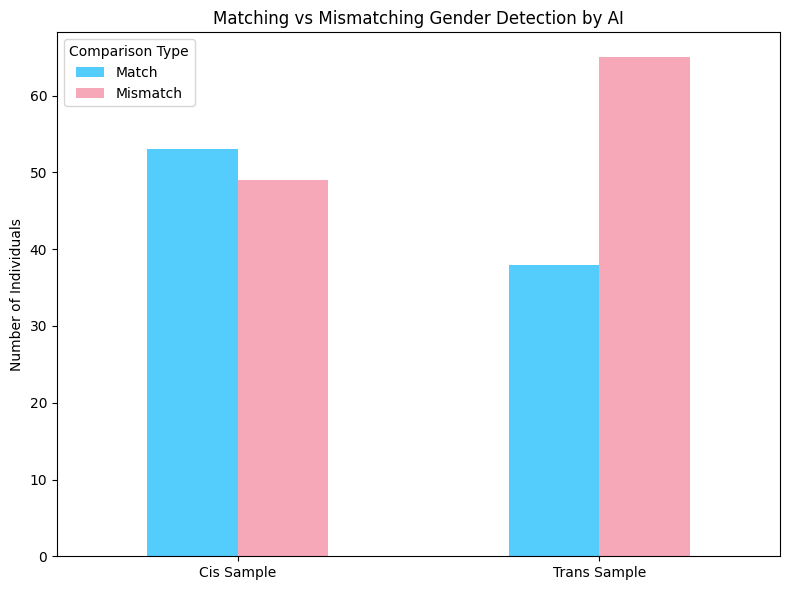

In [12]:
def count_match_mismatch(df):
    matches = (
        ((df['Male'] == 1) & (df['Male_AI'] == 1)) |
        ((df['Female'] == 1) & (df['Female_AI'] == 1)) |
        ((df['Non-Binary'] == 1) & (df['Uncertain_AI'] == 1))
    )
    match_count = matches.sum()
    mismatch_count = len(df) - match_count
    return match_count, mismatch_count

# Computation for both groups
cis_match, cis_mismatch = count_match_mismatch(df_cis)
trans_match, trans_mismatch = count_match_mismatch(df_trans)

# Creation of Dataframe for plotting
df_plot = pd.DataFrame({
    'Match': [cis_match, trans_match],
    'Mismatch': [cis_mismatch, trans_mismatch]
}, index=['Cis Sample', 'Trans Sample'])

# Showing the histogram
df_plot.plot(kind='bar', figsize=(8, 6), color=['#55CDFC', '#F7A8B8'])  # Trans flag colors
plt.title("Matching vs Mismatching Gender Detection by AI")
plt.ylabel("Number of Individuals")
plt.xticks(rotation=0)
plt.legend(title="Comparison Type")
plt.tight_layout()
plt.show()

In general there is a better match per gender on the cis sample rather than on the trans sample. We can finally observe it generally in details.

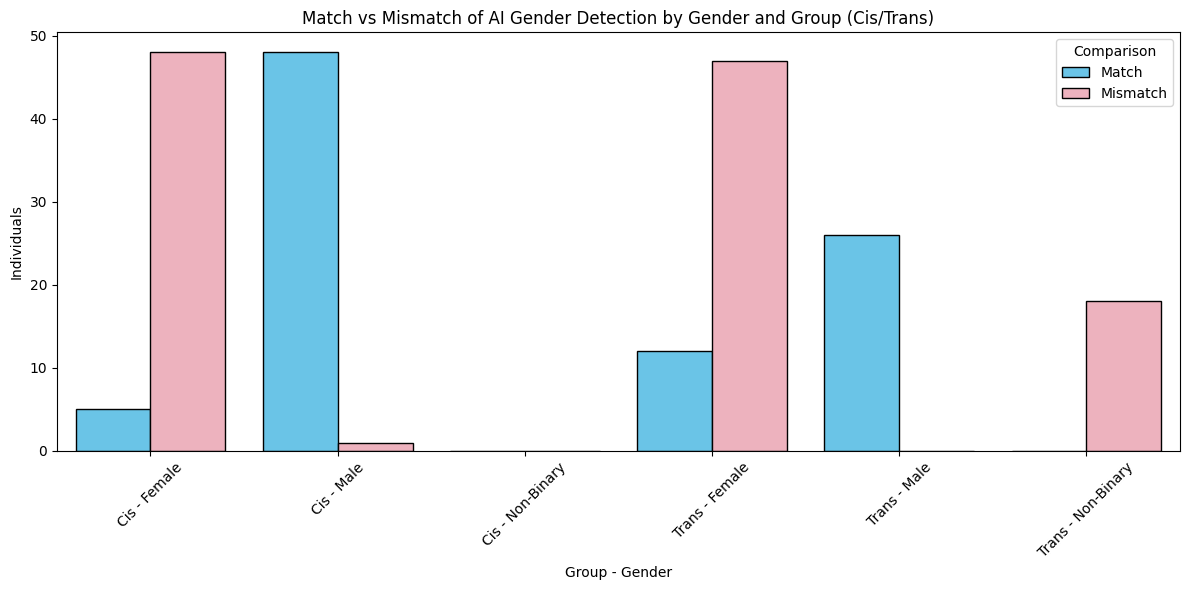

In [15]:
import seaborn as sns

def count_match_mismatch_by_gender(df, gender):
    if gender == 'Female':
        match = (df['Female'] == 1) & (df['Female_AI'] == 1)
        total = (df['Female'] == 1)
    elif gender == 'Male':
        match = (df['Male'] == 1) & (df['Male_AI'] == 1)
        total = (df['Male'] == 1)
    elif gender == 'Non-Binary':
        match = (df['Non-Binary'] == 1) & (df['Uncertain_AI'] == 1)
        total = (df['Non-Binary'] == 1)
    else:
        return 0, 0

    match_count = match.sum()
    mismatch_count = total.sum() - match_count
    return match_count, mismatch_count

# Genders to test
genders = ['Female', 'Male', 'Non-Binary']
groups = ['Cis', 'Trans']

# Initiating data
data = {
    'Group': [],
    'Gender': [],
    'Match': [],
    'Mismatch': []
}

# Filling data
for group_name, df in zip(groups, [df_cis, df_trans]):
    for gender in genders:
        match, mismatch = count_match_mismatch_by_gender(df, gender)
        data['Group'].append(group_name)
        data['Gender'].append(gender)
        data['Match'].append(match)
        data['Mismatch'].append(mismatch)

# Constructing the DataFrame
df_plot = pd.DataFrame(data)

# Combine Group and Gender for a grouped x-axis
df_melted = df_plot.melt(id_vars=['Group', 'Gender'], value_vars=['Match', 'Mismatch'],
                         var_name='Type', value_name='Count')
df_melted['Group_Gender'] = df_melted['Group'] + ' - ' + df_melted['Gender']

plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_melted,
    x='Group_Gender',
    y='Count',
    hue='Type',
    palette=['#55CDFC', '#F7A8B8'],
    dodge=True,
    edgecolor='black',
    errorbar=None
)

plt.title("Match vs Mismatch of AI Gender Detection by Gender and Group (Cis/Trans)")
plt.xlabel("Group - Gender")
plt.ylabel("Individuals")
plt.xticks(rotation=45)
plt.legend(title="Comparison")
plt.tight_layout()
plt.show()

Finally, putting numbers over these figures would allow us to obtain the general accuracy rates.

In [18]:
def compute_accuracy(df, group_name):
    matches = {
        'Female': ((df['Female'] == 1) & (df['Female_AI'] == 1)).sum(),
        'Male': ((df['Male'] == 1) & (df['Male_AI'] == 1)).sum(),
        'Non-binary': ((df['Non-Binary'] == 1) & (df['Uncertain_AI'] == 1)).sum()
    }

    totals = {
        'Female': (df['Female'] == 1).sum(),
        'Male': (df['Male'] == 1).sum(),
        'Non-binary': (df['Non-Binary'] == 1).sum()
    }

    # Computing accuracy rates as percentages
    accuracy = {
        gender: (matches[gender] / totals[gender]) * 100 if totals[gender] > 0 else None
        for gender in matches
    }

    return pd.DataFrame({
        'Group': group_name,
        'Gender': list(accuracy.keys()),
        'Accuracy (%)': list(accuracy.values())
    })

# Applying it for both groups
accuracy_cis = compute_accuracy(df_cis, 'Cis')
accuracy_trans = compute_accuracy(df_trans, 'Trans')

# Grouping the results
accuracy_df = pd.concat([accuracy_cis, accuracy_trans], ignore_index=True)
print(accuracy_df)

   Group      Gender  Accuracy (%)
0    Cis      Female      9.433962
1    Cis        Male     97.959184
2    Cis  Non-binary           NaN
3  Trans      Female     20.338983
4  Trans        Male    100.000000
5  Trans  Non-binary      0.000000


###Mis-aging

This part is rather shorter as it is aiming to observe the general gaps in age predictions. Here a boxployt is sufficient to observe disparities. The fusionning of  both variables happen after.

This part is aiming to look at both mean, median, minimum and maximum values both provided by the sample and found by AI to compare a general youngering or eldering of cisgender or transgender in dividuals.

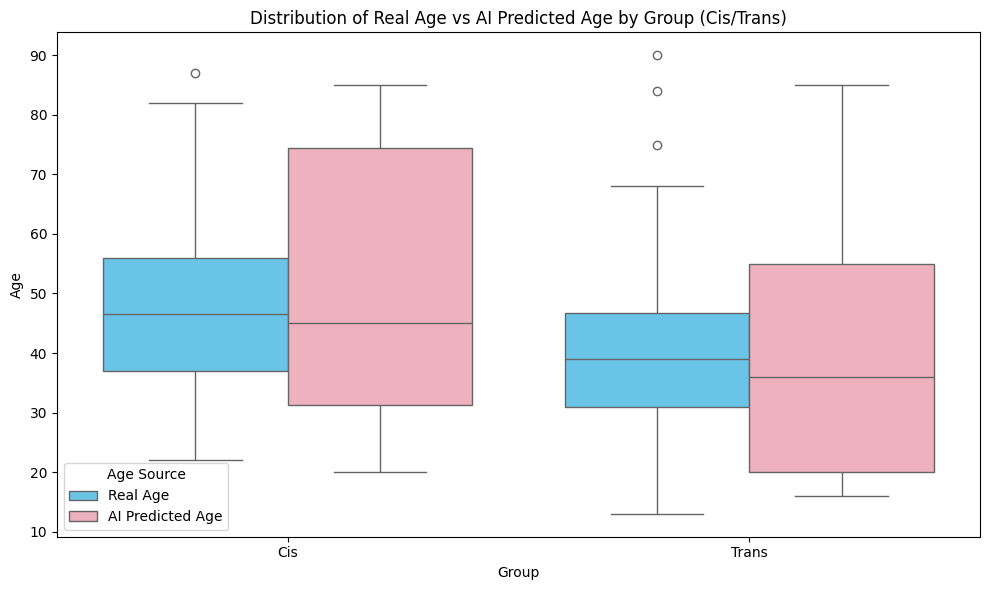

In [19]:
df_cis['Group'] = 'Cis'
df_trans['Group'] = 'Trans'

# Combining both dataframes
df_combined = pd.concat([df_cis, df_trans], ignore_index=True)

# Restrusturing data for having a "Source" column (Real and AI).
df_melted = pd.melt(
    df_combined,
    id_vars='Group',
    value_vars=['Age', 'Age_AI'],
    var_name='Source',
    value_name='Age_Value'
)

#Renaming for more visibility
df_melted['Source'] = df_melted['Source'].replace({'Age': 'Real Age', 'Age_AI': 'AI Predicted Age'})

# 🎨 Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_melted, x='Group', y='Age_Value', hue='Source', palette=['#55CDFC', '#F7A8B8'])

plt.title("Distribution of Real Age vs AI Predicted Age by Group (Cis/Trans)")
plt.ylabel("Age")
plt.xlabel("Group")
plt.legend(title='Age Source')
plt.tight_layout()
plt.show()

###Towards an intersectionnal analysis
- Bonus Part : Look for the Race/Aging/Misgendering but need to add an additional column and reload all the dataset.

We can finally observe the intersection of both these categories to observe how the AI is mostly about misgendering people based on their gender identity.

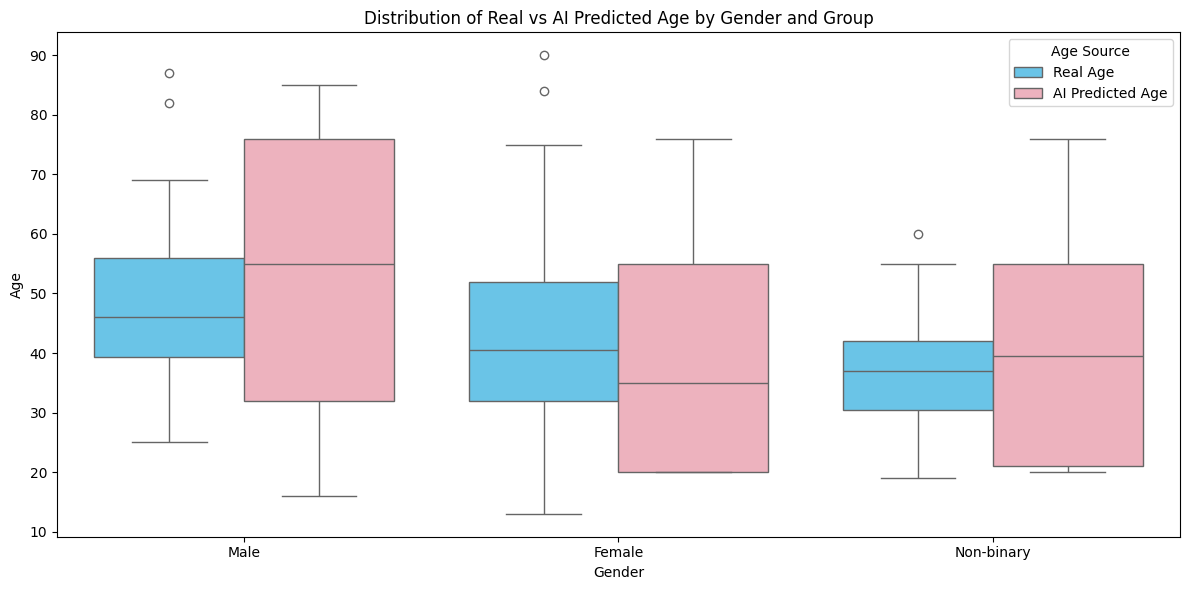

In [20]:
df_cis['Group'] = 'Cis'
df_trans['Group'] = 'Trans'

df_all = pd.concat([df_cis, df_trans], ignore_index=True)

# Determining gender
def detect_gender(row):
    if row['Female'] == 1:
        return 'Female'
    elif row['Male'] == 1:
        return 'Male'
    elif row['Non-Binary'] == 1:
        return 'Non-binary'
    else:
        return 'Unspecified'

df_all['Gender'] = df_all.apply(detect_gender, axis=1)


df_melted = pd.melt(
    df_all,
    id_vars=['Group', 'Gender'],
    value_vars=['Age', 'Age_AI'],
    var_name='Source',
    value_name='Age_Value'
)

df_melted['Source'] = df_melted['Source'].replace({'Age': 'Real Age', 'Age_AI': 'AI Predicted Age'})

plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df_melted,
    x='Gender',
    y='Age_Value',
    hue='Source',
    palette=['#55CDFC', '#F7A8B8'],
    dodge=True
)
plt.title("Distribution of Real vs AI Predicted Age by Gender and Group")
plt.ylabel("Age")
plt.xlabel("Gender")
plt.legend(title="Age Source")
plt.tight_layout()
plt.show()


Finally, for more accuracy, we may also compute it with subcategories as trans men, trans women, cis men, cis-women and non-binary individuals.

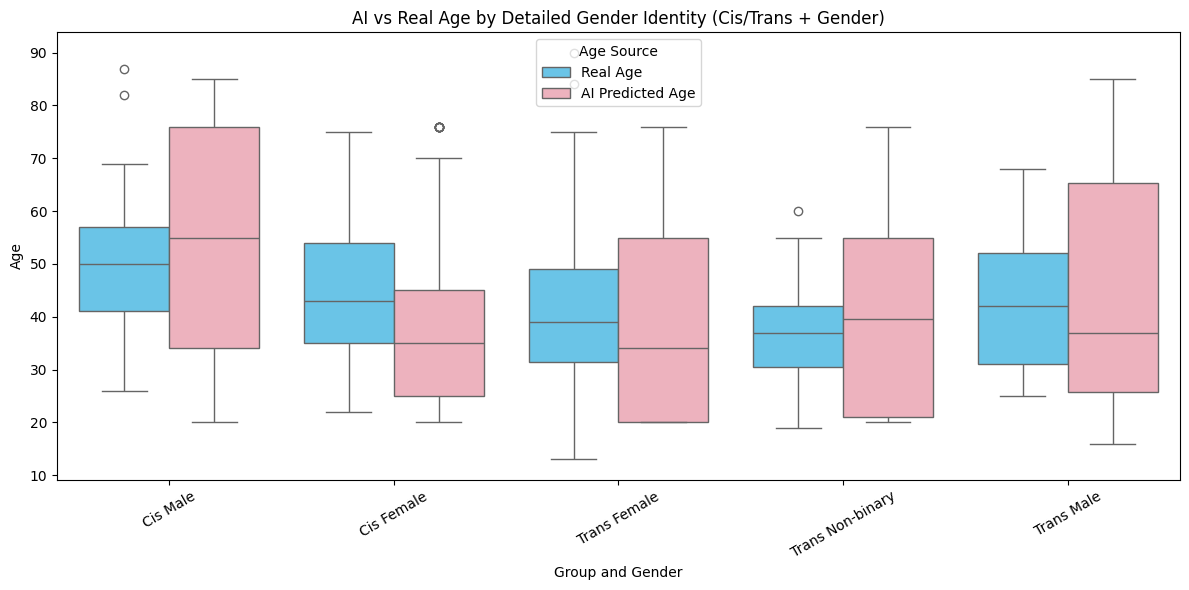

In [22]:
df_cis['Group'] = 'Cis'
df_trans['Group'] = 'Trans'
df_all = pd.concat([df_cis, df_trans], ignore_index=True)

def detect_gender(row):
    if row['Female'] == 1:
        return 'Female'
    elif row['Male'] == 1:
        return 'Male'
    elif row['Non-Binary'] == 1:
        return 'Non-binary'
    else:
        return 'Unspecified'

df_all['Gender'] = df_all.apply(detect_gender, axis=1)

df_all['Group_Gender'] = df_all['Group'] + ' ' + df_all['Gender']

df_melted = pd.melt(
    df_all,
    id_vars=['Group_Gender'],
    value_vars=['Age', 'Age_AI'],
    var_name='Source',
    value_name='Age_Value'
)

df_melted['Source'] = df_melted['Source'].replace({'Age': 'Real Age', 'Age_AI': 'AI Predicted Age'})

# Final Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df_melted,
    x='Group_Gender',
    y='Age_Value',
    hue='Source',
    palette=['#55CDFC', '#F7A8B8'],
    dodge=True
)
plt.title("AI vs Real Age by Detailed Gender Identity (Cis/Trans + Gender)")
plt.ylabel("Age")
plt.xlabel("Group and Gender")
plt.xticks(rotation=30)
plt.legend(title="Age Source")
plt.tight_layout()
plt.show()


To put final numbers on everything, we can provide this detailed accuracy rate of AI aging per gender, per category (Cis or trans).

In [23]:

df_cis['Group'] = 'Cis'
df_trans['Group'] = 'Trans'
df_all = pd.concat([df_cis, df_trans], ignore_index=True)

def detect_gender(row):
    if row['Female'] == 1:
        return 'Female'
    elif row['Male'] == 1:
        return 'Male'
    elif row['Non-Binary'] == 1:
        return 'Non-binary'
    else:
        return 'Unspecified'

df_all['Gender'] = df_all.apply(detect_gender, axis=1)

# Computing a margin of error. We make it to plus/minus 5 years as the AI calibration is not perfect.
df_all['Age_Error'] = abs(df_all['Age'] - df_all['Age_AI'])
df_all['Age_Accurate'] = df_all['Age_Error'] <= 5  # True if error ≤ 5 years


accuracy_age = (
    df_all.groupby(['Group', 'Gender'])['Age_Accurate']
    .agg(['sum', 'count'])
    .reset_index()
)

accuracy_age['Accuracy (%)'] = (accuracy_age['sum'] / accuracy_age['count']) * 100
accuracy_age = accuracy_age.rename(columns={'sum': 'Correct (±5y)', 'count': 'Total'})

# Optional : rounding the results
accuracy_age['Accuracy (%)'] = accuracy_age['Accuracy (%)'].round(2)

print(accuracy_age)

   Group      Gender  Correct (±5y)  Total  Accuracy (%)
0    Cis      Female             22     53         41.51
1    Cis        Male             11     49         22.45
2  Trans      Female             20     59         33.90
3  Trans        Male              8     26         30.77
4  Trans  Non-binary              4     18         22.22


In [25]:
df_cis['Group'] = 'Cis'
df_trans['Group'] = 'Trans'
df_all = pd.concat([df_cis, df_trans], ignore_index=True)

def detect_gender(row):
    if row['Female'] == 1:
        return 'Female'
    elif row['Male'] == 1:
        return 'Male'
    elif row['Non-Binary'] == 1:
        return 'Non-binary'
    else:
        return 'Unspecified'

df_all['Gender'] = df_all.apply(detect_gender, axis=1)

def detect_ai_gender(row):
    if row['Female_AI'] == 1:
        return 'Female'
    elif row['Male_AI'] == 1:
        return 'Male'
    elif row['Uncertain_AI'] == 1:
        return 'Non-binary'
    else:
        return 'Unspecified'

df_all['AI_Gender'] = df_all.apply(detect_ai_gender, axis=1)

df_all['Age_Match'] = abs(df_all['Age'] - df_all['Age_AI']) <= 5
df_all['Gender_Match'] = df_all['Gender'] == df_all['AI_Gender']

def classify_match(row):
    if row['Age_Match'] and row['Gender_Match']:
        return 'Perfect Match'
    elif row['Gender_Match']:
        return 'Only Gender Match'
    elif row['Age_Match']:
        return 'Only Age Match'
    else:
        return 'No Match'

df_all['Match_Type'] = df_all.apply(classify_match, axis=1)

match_summary = df_all.groupby(['Group', 'Match_Type']).size().unstack(fill_value=0)

match_summary_percent = match_summary.div(match_summary.sum(axis=1), axis=0) * 100
match_summary_percent = match_summary_percent.round(2)

print("🧾 Match Counts:")
print(match_summary)
print("\n📊 Accuracy Rates (%):")
print(match_summary_percent)

🧾 Match Counts:
Match_Type  No Match  Only Age Match  Only Gender Match  Perfect Match
Group                                                                 
Cis               28              21                 41             12
Trans             45              20                 26             12

📊 Accuracy Rates (%):
Match_Type  No Match  Only Age Match  Only Gender Match  Perfect Match
Group                                                                 
Cis            27.45           20.59              40.20          11.76
Trans          43.69           19.42              25.24          11.65
